In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


K-Means Clustering

In [15]:
def kmeans_clustering(dataset, k):
    # Initialize centroids randomly
    np.random.seed(42)
    centroids = dataset[np.random.choice(range(dataset.shape[0]), k, replace=False)]
    
    # Initialize cluster labels
    labels = np.zeros(dataset.shape[0])
    
    # Iterate until convergence
    while True:
        # Assign each point to the nearest centroid
        distances = np.sqrt(((dataset - centroids[:, np.newaxis])**2).sum(axis=2))
        new_labels = np.argmin(distances, axis=0)
        
        # Check for convergence
        if np.array_equal(labels, new_labels):
            break
        
        labels = new_labels
        
        # Update centroids
        for i in range(k):
            centroids[i] = np.mean(dataset[labels == i], axis=0)
    
    return labels



Principal Component Analysis (PCA)

In [16]:
def pca(dataset):
    # Subtract the mean from each feature
    mean = np.mean(dataset, axis=0)
    dataset_centered = dataset - mean
    
    # Calculate the covariance matrix
    covariance_matrix = np.cov(dataset_centered.T)
    
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Project the data onto the first three eigenvectors
    dataset_pca = dataset_centered.dot(eigenvectors[:, :3])
    
    return dataset_pca, eigenvalues[:3]

Load the dataset

In [17]:
dataset = pd.read_csv('Iris_Dataset.csv')

Remove the 'Species' column and store it separately for comparison

In [18]:
species = dataset['Species']
dataset = dataset.drop('Species', axis=1)

Convert the dataset to a NumPy array

In [19]:
dataset = dataset.values

Perform K-Means Clustering with k=3

In [20]:
k = 3
cluster_labels = kmeans_clustering(dataset, k)

Perform PCA and project the data onto the first three eigenvectors

In [21]:
dataset_pca, eigenvalues = pca(dataset)

Plot the clusters

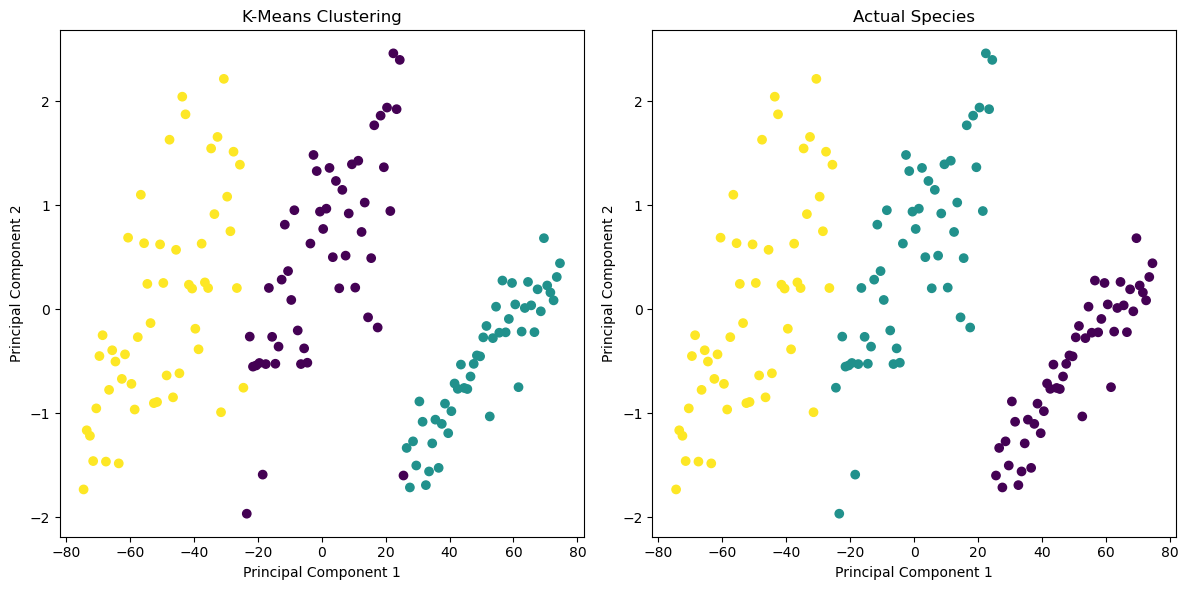

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=cluster_labels, cmap='viridis')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('K-Means Clustering')

# Plot the actual species
ax2.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=species.factorize()[0], cmap='viridis')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_title('Actual Species')

plt.tight_layout()
plt.show()


Print the eigenvalues

In [23]:
print("Eigenvalues:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Eigenvalue {i+1}: {eigenvalue}")

Eigenvalues:
Eigenvalue 1: 1890.7809830163478
Eigenvalue 2: 0.9732866317855776
Eigenvalue 3: 0.22299472861272326
